In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data=pd.read_csv(r'D:\ICT\Assignments\Assignment 6\dataset\car_age_price.csv')

In [7]:
data.head()

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000


In [9]:
data.shape

(112, 2)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    112 non-null    int64
 1   Price   112 non-null    int64
dtypes: int64(2)
memory usage: 1.9 KB


In [13]:
data.isna().sum()

Year     0
Price    0
dtype: int64

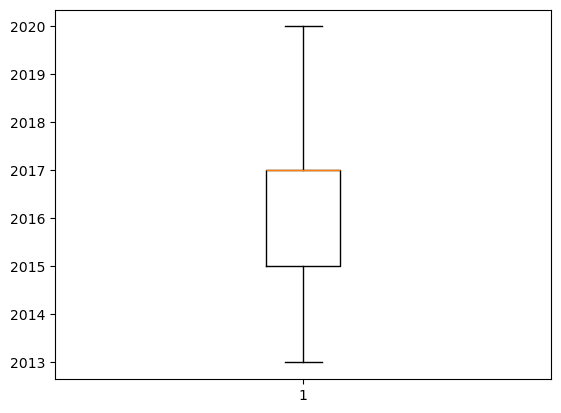

In [17]:
plt.boxplot(data['Year'])
plt.show()

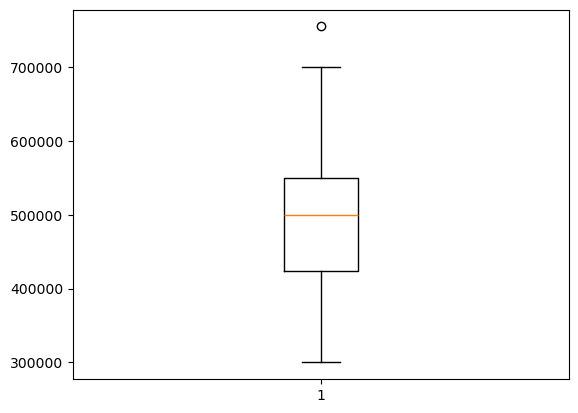

In [19]:
plt.boxplot(data['Price'])
plt.show()

In [37]:
Q1=np.percentile(data['Price'],25)
Q1

423750.0

In [39]:
Q3=np.percentile(data['Price'],75)
Q3

550000.0

In [41]:
IQR=Q3-Q1
IQR

126250.0

In [43]:
lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR


In [45]:
lower_limit

234375.0

In [47]:
upper_limit

739375.0

In [49]:
upper_array=np.where(data['Price']>=upper_limit)[0]
lower_array=np.where(data['Price']<=lower_limit)[0]

In [51]:
upper_array

array([1], dtype=int64)

In [53]:
lower_array

array([], dtype=int64)

In [55]:
data.drop(index=upper_array,inplace=True)
data.drop(index=lower_array,inplace=True)

In [57]:
data.shape

(111, 2)

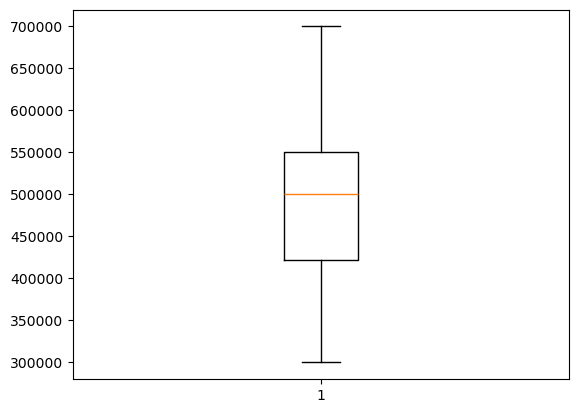

In [59]:
plt.boxplot(data['Price'])
plt.show()

In [61]:
# Since there are no missing values and categorical values Missing Value handling and Encoding is not needed.

### Linear Regression

In [63]:
x=data.drop('Price',axis=1)

In [65]:
y=data['Price']

In [68]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


In [74]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
model=lr.fit(x_train,y_train)

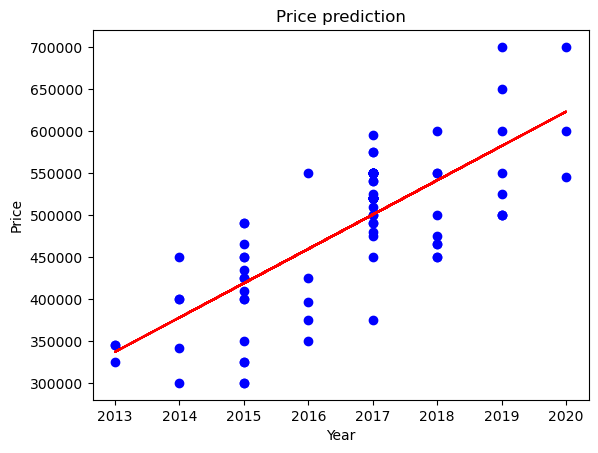

In [76]:
plt.scatter(x_train,y_train,color='blue')
plt.plot(x_train,model.predict(x_train),color='red')
plt.title('Price prediction')
plt.xlabel('Year')
plt.ylabel('Price')
plt.show()

In [78]:
predictions=model.predict(x_test)

In [80]:
from sklearn.metrics import mean_squared_error,r2_score
print('Mean squared Error= ', mean_squared_error(y_test,predictions))
print('R Squared Value= ',r2_score(y_test,predictions))

Mean squared Error=  2360736941.0488067
R Squared Value=  0.7087665874512326


In [97]:
#Q. Can you predict the possible price of a 2022 model second-hand grand i10?
 

In [82]:
value=model.predict([[2022]])

C:\Users\silpa\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [84]:
value

array([704536.23267838])

### Lasso Regression

In [89]:
from sklearn.linear_model import Lasso
lasso=Lasso(alpha=0.1)
model1=lasso.fit(x_train,y_train)

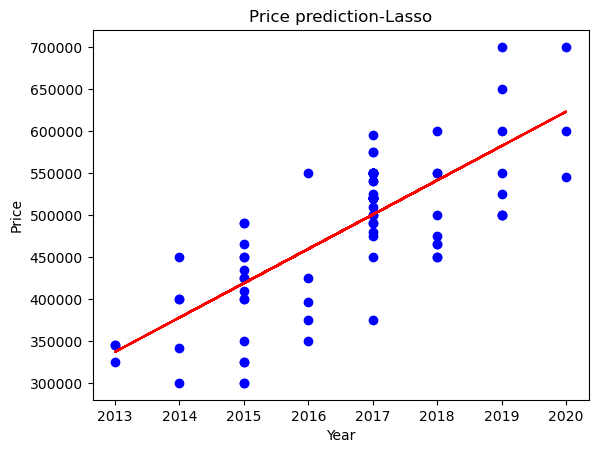

In [91]:
plt.scatter(x_train,y_train,color='blue')
plt.plot(x_train,model1.predict(x_train),color='red')
plt.title('Price prediction-Lasso')
plt.xlabel('Year')
plt.ylabel('Price')
plt.show()

In [93]:
predictions1=model1.predict(x_test)

In [95]:
from sklearn.metrics import mean_squared_error,r2_score
print('Mean squared Error= ', mean_squared_error(y_test,predictions1))
print('R Squared Value= ',r2_score(y_test,predictions1))

Mean squared Error=  2360738206.8636756
R Squared Value=  0.7087664312933915


In [ ]:
#From this I could understand that both perform similarly